In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import os

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [3]:
#import os
#os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle/"

In [4]:
#%cd /content/gdrive/My Drive/Kaggle/Books Data with Category Language and Summary

In [5]:
#!ls

In [6]:
df = pd.read_csv(os.path.join("Preprocessed_data.csv"))
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [7]:
book_df = pd.DataFrame(df["book_title"])
book_df

,book_title
0,Classical Mythology
1,Clara Callan
2,Clara Callan
3,Clara Callan
4,Clara Callan
...,...
1031170,As Hogan Said . . . : The 389 Best Things Anyo...
1031171,All Elevations Unknown: An Adventure in the He...
1031172,Why stop?: A guide to Texas historical roadsid...
1031173,The Are You Being Served? Stories: 'Camping In...


In [8]:
book_df_groups = df.groupby(['book_title'])
book_df_groups

In [32]:
#Make the book list smaller by looking only at books where 100 people have read them
group_with_one = book_df_groups.count()
group = group_with_one[group_with_one["user_id"] > 662]

In [33]:
group.sort_values(["user_id"], ascending= False)
group.reset_index(level=0, inplace=True)

In [34]:
# for books which over 556 people have read
# 385 is the median number of times a book is bought by our 278,858 users
#User count over 834 (278*3); median number is 1096.5
# 446 is the mean number of times a book is bough by our 278,858 users
# 815 is the median for users over 662
group["user_id"].median()

815.0

In [35]:
# Median books: Life of Pi
# 662: Bridget Jones's Diary
# for Over 834: The Lovely Bones: A Novel

mean_books = group[group["user_id"] > 662]
mean_books.sort_values(['user_id'], ascending= True)

,book_title,Unnamed: 0,user_id,location,age,isbn,rating,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
4,Life of Pi,664,664,664,664,664,664,664,664,664,664,664,664,664,664,664,657,650,651
1,Angels & Demons,670,670,670,670,670,670,670,670,670,670,670,670,670,670,670,667,663,660
8,The Red Tent (Bestselling Backlist),723,723,723,723,723,723,723,723,723,723,723,723,723,723,723,721,715,693
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740,740,740,740,740,740,740,740,740,740,740,740,740,740,740,739,731,724
9,The Secret Life of Bees,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,770,762,751
2,Bridget Jones's Diary,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815,809,801,788
7,The Nanny Diaries: A Novel,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,822,818,800
0,A Painted House,838,838,838,838,838,838,838,838,838,838,838,838,838,838,838,836,827,808
5,The Da Vinci Code,898,898,898,898,898,898,898,898,898,898,898,898,898,898,898,891,890,882
6,The Lovely Bones: A Novel,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1295,1291,1273,1227


In [36]:
book_list = pd.DataFrame(group["book_title"])
book_list

,book_title
0,A Painted House
1,Angels & Demons
2,Bridget Jones's Diary
3,Divine Secrets of the Ya-Ya Sisterhood: A Novel
4,Life of Pi
5,The Da Vinci Code
6,The Lovely Bones: A Novel
7,The Nanny Diaries: A Novel
8,The Red Tent (Bestselling Backlist)
9,The Secret Life of Bees


Building a Book-User Matrix

In [37]:
model_df = pd.merge(df, book_list, on="book_title")
model_df

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,769,14,"mediapolis, iowa, usa",34.7439,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Wild animus is a search for the primordial, a ...",en,['Fiction'],mediapolis,iowa,usa
1,770,193,"mumbai, maharashtra, india",23.0000,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Wild animus is a search for the primordial, a ...",en,['Fiction'],mumbai,maharashtra,india
2,771,242,"neuffen, baden-wuerttemberg, germany",37.0000,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Wild animus is a search for the primordial, a ...",en,['Fiction'],neuffen,baden-wuerttemberg,germany
3,772,487,"houston, texas, usa",34.7439,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Wild animus is a search for the primordial, a ...",en,['Fiction'],houston,texas,usa
4,773,569,"lahore, punjab, pakistan",28.0000,0971880107,0,Wild Animus,Rich Shapero,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Wild animus is a search for the primordial, a ...",en,['Fiction'],lahore,punjab,pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10742,518796,39773,"miami, florida, usa",49.0000,069452008X,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1998.0,HarperAudio,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,9,9,9,miami,florida,usa
10743,518797,55892,"plantersville, texas, usa",45.0000,069452008X,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1998.0,HarperAudio,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,9,9,9,plantersville,texas,usa
10744,518798,143175,"blythewood, south carolina, usa",28.0000,069452008X,7,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1998.0,HarperAudio,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,9,9,9,blythewood,south carolina,usa
10745,518799,252695,"lincoln, nebraska, usa",34.7439,069452008X,0,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1998.0,HarperAudio,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,http://images.amazon.com/images/P/069452008X.0...,9,9,9,lincoln,nebraska,usa


In [38]:
user_book_df = model_df.drop(["Unnamed: 0", "location","age", "isbn", "rating", "book_author", "year_of_publication", "publisher", "img_m", "img_l", "img_s", "Summary", "city", "Language","Category", "state", "country"], axis=1)
user_book_df

,user_id,book_title
0,14,Wild Animus
1,193,Wild Animus
2,242,Wild Animus
3,487,Wild Animus
4,569,Wild Animus
...,...,...
10742,39773,Divine Secrets of the Ya-Ya Sisterhood: A Novel
10743,55892,Divine Secrets of the Ya-Ya Sisterhood: A Novel
10744,143175,Divine Secrets of the Ya-Ya Sisterhood: A Novel
10745,252695,Divine Secrets of the Ya-Ya Sisterhood: A Novel


In [39]:
user_matrix = pd.get_dummies(user_book_df["book_title"])
user_matrix

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Life of Pi,The Da Vinci Code,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,Wild Animus
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10742,0,0,0,1,0,0,0,0,0,0,0
10743,0,0,0,1,0,0,0,0,0,0,0
10744,0,0,0,1,0,0,0,0,0,0,0
10745,0,0,0,1,0,0,0,0,0,0,0


In [40]:
combined_df = pd.concat([user_book_df,user_matrix], axis=1)
combined_df.drop(['book_title'], axis=1, inplace=True)
combined_df

,user_id,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Life of Pi,The Da Vinci Code,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,Wild Animus
0,14,0,0,0,0,0,0,0,0,0,0,1
1,193,0,0,0,0,0,0,0,0,0,0,1
2,242,0,0,0,0,0,0,0,0,0,0,1
3,487,0,0,0,0,0,0,0,0,0,0,1
4,569,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10742,39773,0,0,0,1,0,0,0,0,0,0,0
10743,55892,0,0,0,1,0,0,0,0,0,0,0
10744,143175,0,0,0,1,0,0,0,0,0,0,0
10745,252695,0,0,0,1,0,0,0,0,0,0,0


In [41]:
groups = combined_df.groupby('user_id')
groups

In [42]:
book_matrix = groups.sum()
book_matrix.head()

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Life of Pi,The Da Vinci Code,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,Wild Animus
user_id,,,,,,,,,,,
14,0,0,0,0,0,0,0,0,0,0,1
114,0,1,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,1
232,0,0,1,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,1


In [43]:
book_matrix.reset_index(level=0, inplace=True)

In [44]:
book_matrix.drop(['user_id'], axis=1, inplace=True)
book_matrix

,A Painted House,Angels & Demons,Bridget Jones's Diary,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Life of Pi,The Da Vinci Code,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,Wild Animus
0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7161,0,0,0,0,0,0,0,0,0,0,1
7162,0,0,0,0,0,0,0,0,0,1,0
7163,0,0,1,0,0,0,0,0,0,0,0
7164,0,0,1,0,0,0,1,0,0,0,0


In [45]:
#556: Life of Pi
#834: The Lovely Bones: A Novel
y = book_matrix["Bridget Jones's Diary"]
y

0       0
1       0
2       0
3       1
4       0
       ..
7161    0
7162    0
7163    1
7164    1
7165    1
Name: Bridget Jones's Diary, Length: 7166, dtype: uint8

In [46]:
X = book_matrix.drop("Bridget Jones's Diary", axis=1)
X.head()

,A Painted House,Angels & Demons,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Life of Pi,The Da Vinci Code,The Lovely Bones: A Novel,The Nanny Diaries: A Novel,The Red Tent (Bestselling Backlist),The Secret Life of Bees,Wild Animus
0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [49]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.937/0.903
k: 3, Train/Test Score: 0.948/0.931
k: 5, Train/Test Score: 0.946/0.936
k: 7, Train/Test Score: 0.945/0.936
k: 9, Train/Test Score: 0.944/0.938
k: 11, Train/Test Score: 0.944/0.938
k: 13, Train/Test Score: 0.944/0.939
k: 15, Train/Test Score: 0.944/0.939
k: 17, Train/Test Score: 0.944/0.938
k: 19, Train/Test Score: 0.944/0.940
k: 21, Train/Test Score: 0.944/0.940
k: 23, Train/Test Score: 0.944/0.940
k: 25, Train/Test Score: 0.944/0.940
k: 27, Train/Test Score: 0.943/0.940
k: 29, Train/Test Score: 0.943/0.940


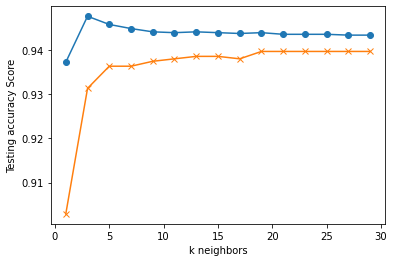

In [50]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [51]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.940


In [62]:
# 834; new_book_data = [[1,0,0]]
# with the 22 books training to predict Life of Pi. If I buy Wild Animus and nothing else, it is predicted that I will not buy Life of Pi
# Nothing -- buy 
# Buy (just one variable): [nothing bought yet; A Painted House; Angels & Demons; Bridget Jones's Diary; Divine Secrets of the Ya-Ya Sisterhood: A Novel; ...
#                              Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)); House of Sand and Fog; Snow Falling on Cedars; Summer Sisters; The Da Vinci Code; The Firm; ...
#                              The Girls' Guide to Hunting and Fishing; The Lovely Bones: A Novel; The Nanny Diaries: A Novel; The Notebook; The Pelican Brief; The Pilot's Wife : A Novel; The Red Tent (Bestselling Backlist); The Secret Life of Bees; The Summons; The Testament; ...
#                              Where the Heart Is (Oprah's Book Club (Paperback))]
# Won't buy (just one variable): [Wild Animus]
#________________________________________________________________________________________

#Test for Bridget Jones' Diary and a 10 book question survey
# Buy (just one variable): [nothing bought yet; ]
# Won't buy (just one variable): [The Lovely Bones: A Novel, Wild Animus] -- complete list
new_book_data = [[1,0,0,0,0,0,0,0,0,0]]
predicted_class = knn.predict(new_book_data)
print(predicted_class)

[1]
